In [8]:
'''
 문) 당료병(diabetes.csv) 데이터 셋을 이용하여 다음과 같은 단계로 
     RandomForest 모델을 생성하시오.

  <단계1> 데이터셋 로드
  <단계2> x,y 변수 생성 : y변수 : 9번째 칼럼, x변수 : 1 ~ 8번째 칼럼
  <단계3> 500개의 트리를 random으로 생성하여 모델 생성 
  <단계4> 5겹 교차검정/평균 분류정확도 출력
  <단계5> 중요변수 시각화 
'''

from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt # 중요변수 시각화 

# 단계1. 테이터셋 로드  
dia = pd.read_csv('C:/Users/hyebin/Desktop/Python_ML/data/diabetes.csv') # 제목 없음  

#print(dia.info()) 
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# 단계2. x,y 변수 생성 
x_data = dia.iloc[:, 0:7]
label = dia.iloc[:, 8]

In [10]:
# 단계3. model 생성
model = RandomForestClassifier(n_estimators=500)
model.fit(x_data, label)

RandomForestClassifier(n_estimators=500)

In [11]:
# 단계4. 교차검정 model 예측/평가 
scores = model_selection.cross_val_score(model, x_data, label, cv=5)
print("개별  Accuracy =", scores)
print("평균 Accuracy =", scores.mean())

개별  Accuracy = [0.72077922 0.71428571 0.72077922 0.80392157 0.7254902 ]
평균 Accuracy = 0.7370511841100076


In [12]:
# 단계5. 중요변수 시각화 
print("특징 중요도 : \n{}".format(model.feature_importances_))

특징 중요도 : 
[0.1046317  0.29270556 0.1044342  0.07898609 0.08073322 0.19241747
 0.14609176]


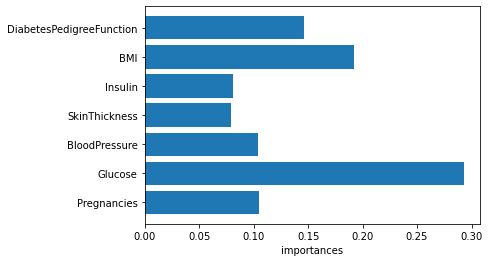

In [13]:
# 중요 변수 시각화
def plot_feature_importances(model):
    x_size = x_data.shape[1] # 13 : x변수 개수 
    # 가로막대 차트 
    plt.barh(range(x_size), model.feature_importances_) # y, width(x)
    # y 축눈금
    plt.yticks(range(x_size), x_data) # size, name 
    plt.xlabel("importances")
    plt.show()

plot_feature_importances(model) 